#[Staddon 1993](https://psycnet.apa.org/record/1995-20273-001)
$$V_{1}(t+1) = a_1V_{1}(t) + (1-a_1)X(t) $$

$$V_S(t) = X(t)-V_1(t+1)$$

$$V_{0}(t)= \left\{\begin{matrix}
V_S(t) \text{  if   } V_S(t)>\theta_1 \\
0  \text{  otherwise }
\end{matrix}\right.$$

$$V_{2}(t+1) = a_2V_{2}(t) + (1-a_2)V_{0}(t) $$

$$V_{S2}(t) = V_{0}(t)-V_2(t+1)$$

$$V_{02}(t)= \left\{\begin{matrix}
V_{S2}(t) \text{  if   } V_{S2}(t)>\theta_2 \\
0  \text{  otherwise }
\end{matrix}\right.$$

$$t=0,1,2,...$$

In [1]:
import numpy as np
from numpy import linalg as LA
class OFF:
    def __init__(self, a=0.5, dt_int=1.0, rate_input = 1, tita= 0.0, recovery=0, recovery_step = 1, a_2=0.95, tita_2=0.0):

        self.a = a
        self.rate_input = int(rate_input)
        self.tita = tita
        self.recovery_step = int(recovery_step)
        self.a_2 = a_2
        self.tita_2 = tita_2
        self.recovery = int(recovery)


        self.tMIN = 0.0
        self.tMAX = 100.0 # in secs
        self.dt = dt_int # in secs
        self.tvec = np.arange(self.tMIN, self.tMAX, self.dt)

        input = [int(i%self.rate_input == 0) for i in range(len(self.tvec)) ]
        self.input = np.array(input)
        self.input[int(len(self.input)/2 +1):] = 0.0
        if self.recovery:
            self.timestep = int(len(self.input)/2 + self.recovery_step)
            self.input[self.timestep] = 1.0

        self.V_i = None
        self.V_0 = None
        self.V_2 = None
        self.V_02 = None

    def run(self, y0=[0.0, 0.0]):
        """
        Runs the model.
        """
        lent = len(self.tvec)
        # allocate space for result
        self.V_i = np.zeros(lent)
        self.V_0 = np.zeros(lent)
        self.V_2 = np.zeros(lent)
        self.V_02 = np.zeros(lent)
        self.V_i[0] = y0[0]
        self.V_2[0] = y0[1]
        for n in range(lent-1):
            self.V_i[n+1] = self.a*self.V_i[n] + (1-self.a)*self.input[n]
            #value = (self.input[n] - self.V_i[n])
            value = (self.input[n] - self.V_i[n+1])
            if ((value-self.tita)>0):
                self.V_0[n] = value
            else:
                self.V_0[n] = 0.0
            self.V_2[n+1] = self.a_2*self.V_2[n] + (1-self.a_2)*self.V_0[n]
            #value_2 = (self.V_0[n] - self.V_2[n])
            value_2 = (self.V_0[n] - self.V_2[n+1])
            if ((value_2-self.tita_2)>0):
                self.V_02[n] = value_2
            else:
                self.V_02[n] = 0.0

In [2]:
from scipy.signal import find_peaks
model_1 = OFF(rate_input = 1, recovery_step = 40) # recovery en el tiempo 50 + 40
model_1.run()
peaks1, _ = find_peaks( model_1.V_02)
peaks1 = np.insert(peaks1, 0, 0, axis=0) # agrega el t=0 a los picos


model_2 = OFF(rate_input = 2, recovery_step = 40) # un tiempo con input, un tiempo sin input, y asi sucesivamente
model_2.run()
peaks2, _ = find_peaks( model_2.V_02)
peaks2 = np.insert(peaks2, 0, 0, axis=0)

model_3 = OFF(rate_input = 3, recovery_step = 40)
model_3.run()
peaks3, _ = find_peaks( model_3.V_02)
peaks3 = np.insert(peaks3, 0, 0, axis=0)

model_4 = OFF(rate_input = 4, recovery_step = 40)
model_4.run()
peaks4, _ = find_peaks( model_4.V_02)
peaks4 = np.insert(peaks4, 0, 0, axis=0)

model_5 = OFF(rate_input = 5, recovery_step = 40)
model_5.run()
peaks5, _ = find_peaks( model_5.V_02)
peaks5 = np.insert(peaks5, 0, 0, axis=0)

#[Staddon 1993](https://psycnet.apa.org/record/1995-20273-001)
$$M_{1}(t+1) = (1-a_1)I(t) +  a_1M_{1}(t) $$

$$R_{S1}(t) = I(t)-M_1(t+1)$$

$$R_{1}(t)= \left\{\begin{matrix}
R_{S1}(t) \text{  if   } R_{S1}(t)>\theta_1 \\
0  \text{  otherwise }
\end{matrix}\right.$$

$$M_{2}(t+1) = (1-a_2)R_{1}(t) + a_2M_{2}(t) $$

$$R_{S2}(t) = R_{1}(t)-M_2(t+1)$$

$$R_{2}(t)= \left\{\begin{matrix}
R_{S2}(t) \text{  if   } R_{S2}(t)>\theta_2 \\
0  \text{  otherwise }
\end{matrix}\right.$$

$$t=0,1,2,...$$

# **Habituation time (ht)**

$$d_i = \frac{p_i-p_{i+1}}{p_i}<0.01$$

Here, $p_j$ denotes the jth peak and $d_j$ is the relative difference between peak $j$ and $j + 1$.
Habituation time is then defined as the number of applied stimuli until the relative differences fall below a fixed threshold. By default this threshold was set to 0.01. It is worth mentioning that habituation time is measured in number of stimuli and not in units of time.

In [3]:
diff_1=[]
diff_2=[]
diff_3=[]
diff_4=[]
diff_5=[]

for i in range(5):
    diff_1.append((model_1.V_02[i] - model_1.V_02[i+1])/model_1.V_02[i]) # falla porque model_1.V_02[i]=0 a partir de i=4

for i in range(len(model_2.V_02[peaks2])-1):
    diff_2.append((model_2.V_02[peaks2][i] - model_2.V_02[peaks2][i+1])/model_2.V_02[peaks2][i])

for i in range(len(model_3.V_02[peaks3])-1):
    diff_3.append((model_3.V_02[peaks3][i] - model_3.V_02[peaks3][i+1])/model_3.V_02[peaks3][i])


for i in range(len(model_4.V_02[peaks4])-1):
    diff_4.append((model_4.V_02[peaks4][i] - model_4.V_02[peaks4][i+1])/model_4.V_02[peaks4][i])

for i in range(len(model_5.V_02[peaks5])-1):
    diff_5.append((model_5.V_02[peaks5][i] - model_5.V_02[peaks5][i+1])/model_5.V_02[peaks5][i])

C:\Users\Maria\AppData\Local\Temp\ipykernel_12544\201136686.py:8: RuntimeWarning: invalid value encountered in scalar divide
  diff_1.append((model_1.V_02[i] - model_1.V_02[i+1])/model_1.V_02[i]) # falla porque model_1.V_02[i]=0 a partir de i=4


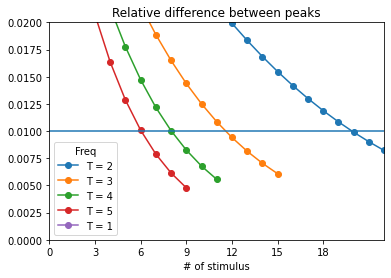

In [6]:
import matplotlib.pyplot as plt
plt.plot(diff_2, "o-",label= "T = 2")
plt.plot(diff_3, "o-",label= "T = 3")
plt.plot(diff_4, "o-",label= "T = 4")
plt.plot(diff_5, "o-",label= "T = 5")
plt.plot(diff_1, "o-",label= "T = 1")

plt.axhline(y=0.01)
plt.xlim((0,22))
plt.xlabel("# of stimulus")
plt.title("Relative difference between peaks")
plt.ylim((0,0.020))
plt.xticks(np.arange(0, 21, 3.0))
plt.legend()
legend = plt.legend(title="Freq")

#plt.savefig("staddon_cascade_habituation_time.png", dpi=500)
#from google.colab import files
#files.download("staddon_cascade_habituation_time.png")

In [6]:
np.array(diff_1) # after input 5 it becomes nan (division by zero)

array([0.55      , 0.60555556, 0.75422535, 1.        ,        nan])

In [7]:
np.argmax(np.array(diff_2)<0.01) +1

21

In [8]:
np.argmax(np.array(diff_3)<0.01)+1

13

In [9]:
np.argmax(np.array(diff_4)<0.01)+1

10

In [10]:
np.argmax(np.array(diff_5)<0.01)+1

8

In [ ]:
# old code
"""
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
cmap = matplotlib.cm.get_cmap('Blues')
colors = [cmap(0.99), cmap(0.8), cmap(0.6), cmap(0.4), cmap(0.2)]

fig, axes = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(12, 5))
ax=axes[0]
ax.plot(model_5.tvec[peaks5], model_5.V_02[peaks5], "o-", label= "T = 5 ht=8", color=colors[4])
ax.plot(model_4.tvec[peaks4], model_4.V_02[peaks4], "o-", label= "T = 4 ht=10", color=colors[3])
ax.plot(model_3.tvec[peaks3], model_3.V_02[peaks3], "o-", label= "T = 3 ht=13", color=colors[2])
ax.plot(model_2.tvec[peaks2], model_2.V_02[peaks2], "o-", label= "T = 2 ht=21", color=colors[1])
ax.plot(model_1.tvec[:], model_1.V_02[:], "o-", label= "T = 1 ht=5", color=colors[0])
ax.set_xlabel("time steps")
ax.set_ylabel(r"$V_{02}$")
ax.set_title('habituation curve')
#ax.set_title(r"$a_1=0.5$, $a_2=0.95$, $\theta_1=\theta_2=0.0$")
ax.legend()
ax.set_xlim((-2,50))


ax=axes[1]
ax.plot( envelope2, color=colors[1])
ax.plot( envelope3, color=colors[2])
ax.plot( envelope4, color=colors[3])
ax.plot( envelope5, color=colors[4])
ax.plot( envelope1, color=colors[0])
ax.set_xlim((-1, 40))
ax.set_xlabel("time steps")
ax.set_title('recovery envelope')
#plt.set_xlim((-2, 40))
plt.savefig("staddon_1993_habituation_recovery.png", dpi=500)
sns.despine()
plt.tight_layout()
plt.show()
"""

C:\Users\Maria\AppData\Local\Temp\ipykernel_12544\913466020.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Blues')


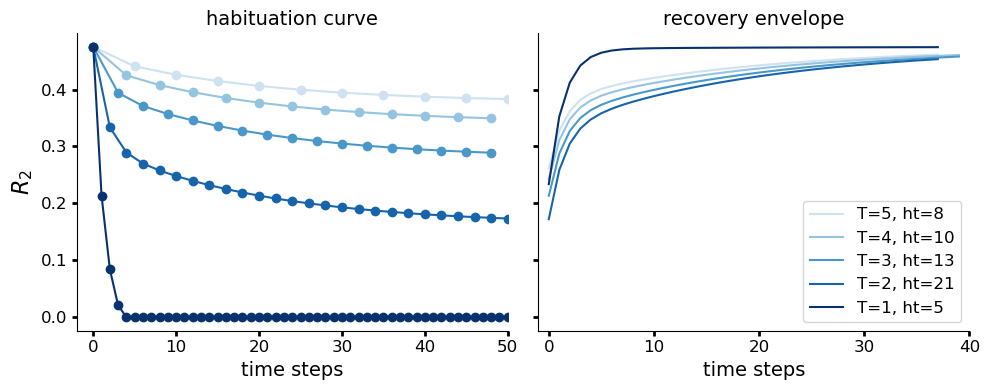

In [23]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
cmap = matplotlib.cm.get_cmap('Blues')
colors = [cmap(0.99), cmap(0.8), cmap(0.6), cmap(0.4), cmap(0.2)]

fig, axes = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(10, 4))
ax=axes[0]
ax.plot(model_5.tvec[peaks5], model_5.V_02[peaks5], "o-", label= "T = 5 ht=8", color=colors[4])
ax.plot(model_4.tvec[peaks4], model_4.V_02[peaks4], "o-", label= "T = 4 ht=10", color=colors[3])
ax.plot(model_3.tvec[peaks3], model_3.V_02[peaks3], "o-", label= "T = 3 ht=13", color=colors[2])
ax.plot(model_2.tvec[peaks2], model_2.V_02[peaks2], "o-", label= "T = 2 ht=21", color=colors[1])
ax.plot(model_1.tvec[:], model_1.V_02[:], "o-", label= "T = 1 ht=5", color=colors[0])
ax.set_xlabel("time steps", fontsize=14)
ax.set_ylabel(r"$R_{2}$", fontsize=16)
ax.set_title('habituation curve', fontsize=14)
ax.tick_params(width=2, axis='both', which='major', labelsize=12)
#ax.set_title(r"$a_1=0.5$, $a_2=0.95$, $\theta_1=\theta_2=0.0$")
#ax.legend()
ax.set_xlim((-2,50))


ax=axes[1]

ax.plot( envelope5, label= "T=5, ht=8", color=colors[4])
ax.plot( envelope4, label= "T=4, ht=10", color=colors[3])
ax.plot( envelope3, label= "T=3, ht=13", color=colors[2])
ax.plot( envelope2, label= "T=2, ht=21", color=colors[1])
ax.plot( envelope1, label= "T=1, ht=5", color=colors[0])
ax.set_xlim((-1, 40))
ax.set_xlabel("time steps", fontsize=14)
ax.set_title('recovery envelope', fontsize=14)
ax.tick_params(width=2, axis='both', which='major', labelsize=12)
ax.legend(fontsize=12)
#plt.set_xlim((-2, 40))
plt.savefig("FigSI1_Staddon.pdf", bbox_inches="tight")
sns.despine()
plt.tight_layout()
plt.show()

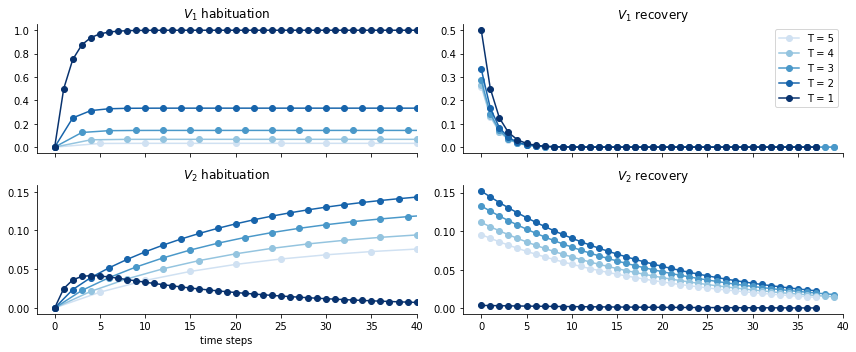

In [104]:
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(12, 5))
ax=axes[0][0]
ax.plot(model_5.tvec[peaks5], model_5.V_i[peaks5], "o-", label= "T = 5 ht=8", color=colors[4])
ax.plot(model_4.tvec[peaks4], model_4.V_i[peaks4], "o-", label= "T = 4 ht=10", color=colors[3])
ax.plot(model_3.tvec[peaks3], model_3.V_i[peaks3], "o-", label= "T = 3 ht=13", color=colors[2])
ax.plot(model_2.tvec[peaks2], model_2.V_i[peaks2], "o-", label= "T = 2 ht=21", color=colors[1])
ax.plot(model_1.tvec[:], model_1.V_i[:], "o-", label= "T = 1 ht=5", color=colors[0])
ax.set_title(r"$V_{1}$"+" habituation")
ax.set_xlim((-2,50))

ax=axes[1][0]
ax.plot(model_5.tvec[peaks5], model_5.V_2[peaks5], "o-", label= "T = 5 ht=8", color=colors[4])
ax.plot(model_4.tvec[peaks4], model_4.V_2[peaks4], "o-", label= "T = 4 ht=10", color=colors[3])
ax.plot(model_3.tvec[peaks3], model_3.V_2[peaks3], "o-", label= "T = 3 ht=13", color=colors[2])
ax.plot(model_2.tvec[peaks2], model_2.V_2[peaks2], "o-", label= "T = 2 ht=21", color=colors[1])
ax.plot(model_1.tvec[:], model_1.V_2[:], "o-", label= "T = 1 ht=5", color=colors[0])
ax.set_xlabel("time steps")
ax.set_title(r"$V_{2}$"+" habituation")
ax.set_xlim((-2,50))

ax=axes[0][1]
ax.plot( envelope5_M1, 'o-',label= "T = 5", color=colors[4])
ax.plot( envelope4_M1, 'o-',label= "T = 4", color=colors[3])
ax.plot( envelope3_M1, 'o-',label= "T = 3", color=colors[2])
ax.plot( envelope2_M1, 'o-',label= "T = 2", color=colors[1])
ax.plot( envelope1_M1, 'o-',label= "T = 1", color=colors[0])
ax.set_title(r"$V_{1}$"+" recovery")
ax.set_xlim((-2,40))
ax.legend()

ax=axes[1][1]
ax.plot( envelope2_M2, 'o-', label= "T = 2", color=colors[1])
ax.plot( envelope3_M2, 'o-',label= "T = 3", color=colors[2])
ax.plot( envelope4_M2, 'o-',label= "T = 4", color=colors[3])
ax.plot( envelope5_M2, 'o-',label= "T = 5", color=colors[4])
ax.plot( envelope1_M2, 'o-',label= "T = 1", color=colors[0])
#ax.title("")
ax.set_title(r"$V_{2}$"+" recovery")
ax.set_xlim((-2,40))

plt.savefig("staddon_1993_memory_reversal.png", dpi=500)
sns.despine()
plt.tight_layout()
plt.show()

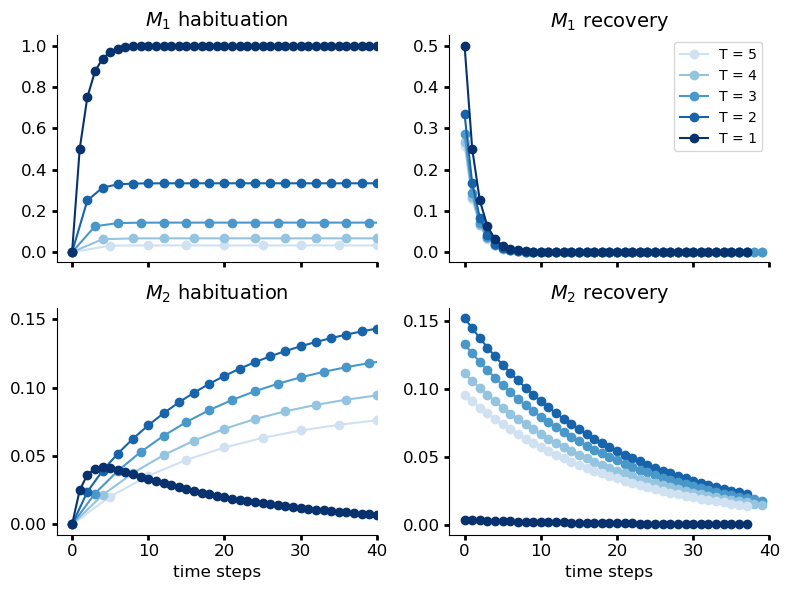

In [39]:
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(8, 6))
ax=axes[0][0]
ax.plot(model_5.tvec[peaks5], model_5.V_i[peaks5], "o-", label= "T = 5 ht=8", color=colors[4])
ax.plot(model_4.tvec[peaks4], model_4.V_i[peaks4], "o-", label= "T = 4 ht=10", color=colors[3])
ax.plot(model_3.tvec[peaks3], model_3.V_i[peaks3], "o-", label= "T = 3 ht=13", color=colors[2])
ax.plot(model_2.tvec[peaks2], model_2.V_i[peaks2], "o-", label= "T = 2 ht=21", color=colors[1])
ax.plot(model_1.tvec[:], model_1.V_i[:], "o-", label= "T = 1 ht=5", color=colors[0])
ax.set_title(r"$M_{1}$"+" habituation", fontsize=14)
ax.set_xlabel("", fontsize=14)
ax.tick_params(width=2, axis='both', which='major', labelsize=12)
ax.set_xlim((-2,50))

ax=axes[1][0]
ax.plot(model_5.tvec[peaks5], model_5.V_2[peaks5], "o-", label= "T = 5 ht=8", color=colors[4])
ax.plot(model_4.tvec[peaks4], model_4.V_2[peaks4], "o-", label= "T = 4 ht=10", color=colors[3])
ax.plot(model_3.tvec[peaks3], model_3.V_2[peaks3], "o-", label= "T = 3 ht=13", color=colors[2])
ax.plot(model_2.tvec[peaks2], model_2.V_2[peaks2], "o-", label= "T = 2 ht=21", color=colors[1])
ax.plot(model_1.tvec[:], model_1.V_2[:], "o-", label= "T = 1 ht=5", color=colors[0])
ax.set_xlabel("time steps", fontsize=12)
ax.set_title(r"$M_{2}$"+" habituation", fontsize=14)
ax.tick_params(width=2, axis='both', which='major', labelsize=12)
ax.set_xlim((-2,50))

ax=axes[0][1]
ax.plot( envelope5_M1, 'o-',label= "T = 5", color=colors[4])
ax.plot( envelope4_M1, 'o-',label= "T = 4", color=colors[3])
ax.plot( envelope3_M1, 'o-',label= "T = 3", color=colors[2])
ax.plot( envelope2_M1, 'o-',label= "T = 2", color=colors[1])
ax.plot( envelope1_M1, 'o-',label= "T = 1", color=colors[0])
ax.set_title(r"$M_{1}$"+" recovery", fontsize=14)
ax.tick_params(width=2, axis='both', which='major', labelsize=12)
ax.set_xlim((-2,40))
ax.set_xlabel("", fontsize=14)
ax.legend()

ax=axes[1][1]
ax.plot( envelope2_M2, 'o-', label= "T = 2", color=colors[1])
ax.plot( envelope3_M2, 'o-',label= "T = 3", color=colors[2])
ax.plot( envelope4_M2, 'o-',label= "T = 4", color=colors[3])
ax.plot( envelope5_M2, 'o-',label= "T = 5", color=colors[4])
ax.plot( envelope1_M2, 'o-',label= "T = 1", color=colors[0])
#ax.title("")
ax.set_title(r"$M_{2}$"+" recovery", fontsize=14)
ax.tick_params(width=2, axis='both', which='major', labelsize=12)
ax.set_xlabel("time steps", fontsize=12)
ax.set_xlim((-2,40))
for ax in axes.flatten():
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

#plt.savefig("staddon_1993_memory_reversal.png", dpi=500)
plt.savefig("FigSI2_Staddon_memory.pdf", bbox_inches="tight")
sns.despine()
plt.tight_layout()
plt.show()

# Salvo el caso T=1, con esta definición de ht: estimulación menos frecuente (T mayor), se habitúa más rápido (ht menor).

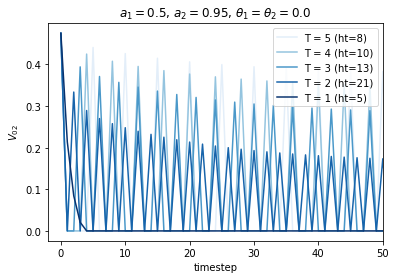

In [52]:
import matplotlib
cmap = matplotlib.cm.get_cmap('Blues')
colors = [cmap(0.99), cmap(0.8), cmap(0.6), cmap(0.4), cmap(0.1)]

plt.plot(model_5.tvec, model_5.V_02, "-", label= "T = 5 (ht=8)", color=colors[4])
plt.plot(model_4.tvec, model_4.V_02, "-", label= "T = 4 (ht=10)", color=colors[3])
plt.plot(model_3.tvec, model_3.V_02, "-", label= "T = 3 (ht=13)", color=colors[2])
plt.plot(model_2.tvec, model_2.V_02, "-", label= "T = 2 (ht=21)", color=colors[1])
plt.plot(model_1.tvec[:], model_1.V_02[:], "-", label= "T = 1 (ht=5)", color=colors[0])
plt.xlabel("time step")
plt.ylabel(r"$V_{02}$")
plt.title(r"$a_1=0.5$, $a_2=0.95$, $\theta_1=\theta_2=0.0$")
plt.legend()
plt.xlim((-2,50))
plt.show()

# **Recovery**

In [5]:
timestep1=[]
envelope1=[]
envelope1_M1=[]
envelope1_M2=[]
for recovery in range(2,40):
    model_10 = OFF(rate_input = 1, recovery=1, recovery_step = recovery)
    model_10.run()
    envelope1.append(model_10.V_02[model_10.timestep])
    envelope1_M1.append(model_10.V_i[model_10.timestep])
    envelope1_M2.append(model_10.V_2[model_10.timestep])
    timestep1.append(model_10.timestep)

timestep2=[]
envelope2=[]
envelope2_M1=[]
envelope2_M2=[]
for recovery in range(2,40):
    model_10 = OFF(rate_input = 2, recovery=1, recovery_step = recovery)
    model_10.run()
    envelope2.append(model_10.V_02[model_10.timestep ])
    envelope2_M1.append(model_10.V_i[model_10.timestep])
    envelope2_M2.append(model_10.V_2[model_10.timestep])
    timestep2.append(model_10.timestep)

timestep3=[]
envelope3=[]
envelope3_M1=[]
envelope3_M2=[]
for recovery in range(0,40):
    model_10 = OFF(rate_input = 3, recovery=1, recovery_step = recovery)
    model_10.run()
    envelope3.append(model_10.V_02[model_10.timestep ])
    envelope3_M1.append(model_10.V_i[model_10.timestep])
    envelope3_M2.append(model_10.V_2[model_10.timestep])
    timestep3.append(model_10.timestep)

timestep4=[]
envelope4=[]
envelope4_M1=[]
envelope4_M2=[]
for recovery in range(0,40):
    model_10 = OFF(rate_input = 4, recovery=1, recovery_step = recovery)
    model_10.run()
    envelope4.append(model_10.V_02[model_10.timestep ])
    envelope4_M1.append(model_10.V_i[model_10.timestep])
    envelope4_M2.append(model_10.V_2[model_10.timestep])
    timestep4.append(model_10.timestep)

timestep5=[]
envelope5=[]
envelope5_M1=[]
envelope5_M2=[]
for recovery in range(2,40):
    model_10 = OFF(rate_input = 5, recovery=1, recovery_step = recovery)
    model_10.run()
    envelope5.append(model_10.V_02[model_10.timestep])
    envelope5_M1.append(model_10.V_i[model_10.timestep])
    envelope5_M2.append(model_10.V_2[model_10.timestep])
    timestep5.append(model_10.timestep)

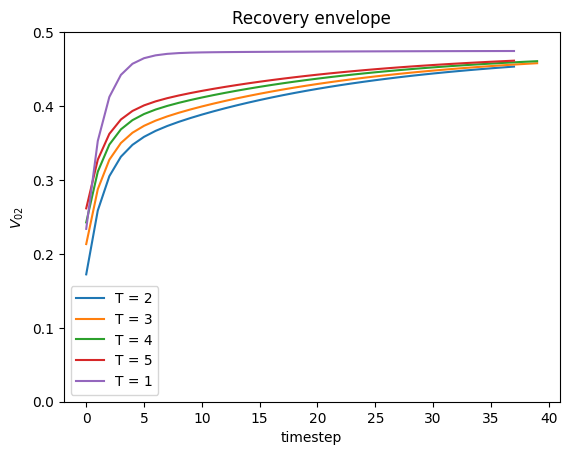

In [13]:
plt.plot( envelope2, label= "T = 2")
plt.plot( envelope3, label= "T = 3")
plt.plot( envelope4, label= "T = 4")
plt.plot( envelope5, label= "T = 5")
plt.plot( envelope1, label= "T = 1")
plt.legend()
plt.title("Recovery envelope")
#plt.xlim((45,100))
plt.xlabel("timestep")
plt.ylabel(r"$V_{02}$")
plt.title("Recovery envelope")
plt.legend()
plt.ylim((0,0.5))

#plt.savefig("staddon_cascade_recovery2.png", dpi=500)
#from google.colab import files
#files.download("staddon_cascade_recovery2.png")
plt.show()

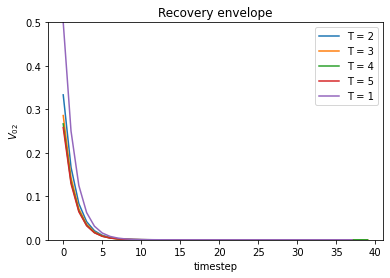

In [93]:
plt.plot( envelope2_M1, label= "T = 2")
plt.plot( envelope3_M1, label= "T = 3")
plt.plot( envelope4_M1, label= "T = 4")
plt.plot( envelope5_M1, label= "T = 5")
plt.plot( envelope1_M1, label= "T = 1")
plt.legend()
plt.title("Recovery envelope")
#plt.xlim((45,100))
plt.xlabel("timestep")
plt.ylabel(r"$V_{02}$")
plt.title("Recovery envelope")
plt.legend()
plt.ylim((0,0.5))

#plt.savefig("staddon_cascade_recovery2.png", dpi=500)
#from google.colab import files
#files.download("staddon_cascade_recovery2.png")
plt.show()

# Salvo el caso T=1 estimulación menos frecuente (T mayor), se recupera más rápido.